# **Machine Learning Lab Project**

**Stock Price Pridiction**





# Tesla data Prediction

In [ ]:
 #import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

import math

#read the file
tesla = pd.read_csv('/content/tesla.csv')

#print the head
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,06-07-2010,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
1,07-07-2010,16.400000,16.629999,14.980000,15.800000,15.800000,6921700
2,08-07-2010,16.139999,17.520000,15.570000,17.459999,17.459999,7711400
3,09-07-2010,17.580000,17.900000,16.549999,17.400000,17.400000,4050600
4,12-07-2010,17.950001,18.070000,17.000000,17.049999,17.049999,2202500


In [ ]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2184 non-null   object 
 1   Open       2184 non-null   float64
 2   High       2184 non-null   float64
 3   Low        2184 non-null   float64
 4   Close      2184 non-null   float64
 5   Adj Close  2184 non-null   float64
 6   Volume     2184 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 119.6+ KB


In [ ]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

In [ ]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} {tesla.Date.max()}')
print(f'Total days = {(tesla.Date.max() - tesla.Date.min()).days} days')

Dataframe contains stock prices between 2010-01-09 00:00:00 2019-12-02 00:00:00
Total days = 3614 days


In [ ]:
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2.184000e+03
mean,175.679538,178.734757,172.441809,175.677550,175.677550,5.055842e+06
std,115.514138,117.308992,113.581785,115.511987,115.511987,4.531720e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.127500,33.977500,32.500000,33.207500,33.207500,1.573200e+06
50%,204.965003,208.095001,201.659996,204.965003,204.965003,4.151200e+06
75%,261.905014,264.725006,256.074990,261.380005,261.380005,6.825525e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


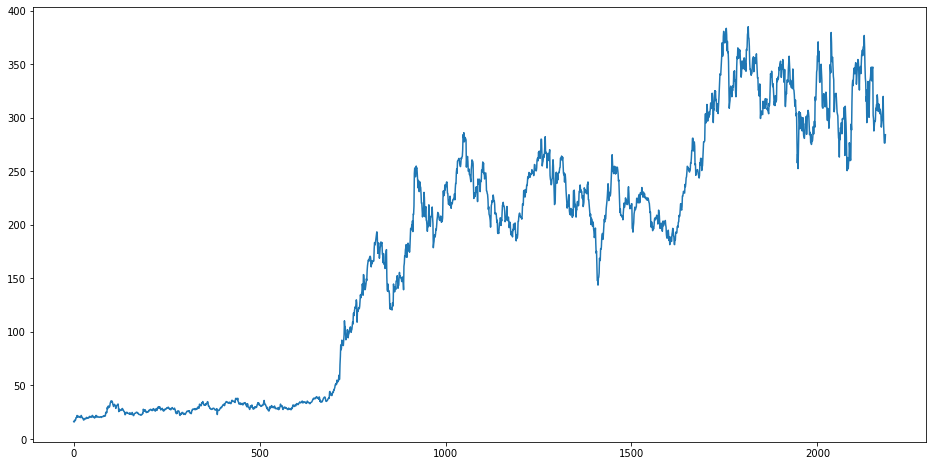

In [ ]:
#Setting the Layout for our plot
layout = go.Layout(
    title = 'Stock Prices of Tesla',
    xaxis = dict(
        title = 'Date',
        titlefont = dict(
            family = 'Courier New, monospace', 
            size = 18,
            color = '#7f7f7f'
        )
    ),
    yaxis = dict(
        title = 'Price',
        titlefont = dict(
            family = 'Courier New, monospace', 
            size = 18,
            color = '#7f7f7f'
        )
    )
)

tesla_data = [{'x':tesla['Date'], 'y':tesla['Close']}]
plot = go.Figure(data = tesla_data, layout = layout)
#plot
#plt.plot(renderer = "colab")

#plot
plt.figure(figsize=(16,8))
plt.plot(tesla['Close'], label='Close Price history')

In [ ]:
#Building the regresssion model
from sklearn.model_selection import train_test_split

import plotly.graph_objs as go

#for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [ ]:
#split the data into train and test sets

X = np.array(tesla.index).reshape(-1,1)
Y = tesla['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state = 101)

In [ ]:
#Feature scaling
scaler = StandardScaler().fit(X_train)

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#Plot actual and predicted values for train datase
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode  = 'lines',
    name = 'Predicted'
)
tesla_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data = tesla_data, layout = layout)

In [ ]:
plot2.show(renderer="colab")

In [ ]:
#calculate scores for model evaluation
scores = f''' 
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)} 
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))} 
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''

print(scores)

 
Metric           Train                Test         
r2_score  0.8653903102262495	0.8629979614862864 
MSE       1800.766851351372	1801.356966055652



# Tata stock prices prediction

In [ ]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('/content/NSE-TATAGLOBAL11.csv')

#print the head
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,08-10-2018,208.00,222.25,206.85,216.00,215.15,4642146,10062.83
1,05-10-2018,217.00,218.60,205.90,210.25,209.20,3519515,7407.06
2,04-10-2018,223.50,227.80,216.15,217.25,218.20,1728786,3815.79
3,03-10-2018,230.00,237.50,225.75,226.45,227.60,1708590,3960.27
4,01-10-2018,234.55,234.60,221.05,230.30,230.90,1534749,3486.05


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   int64  
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 77.3+ KB


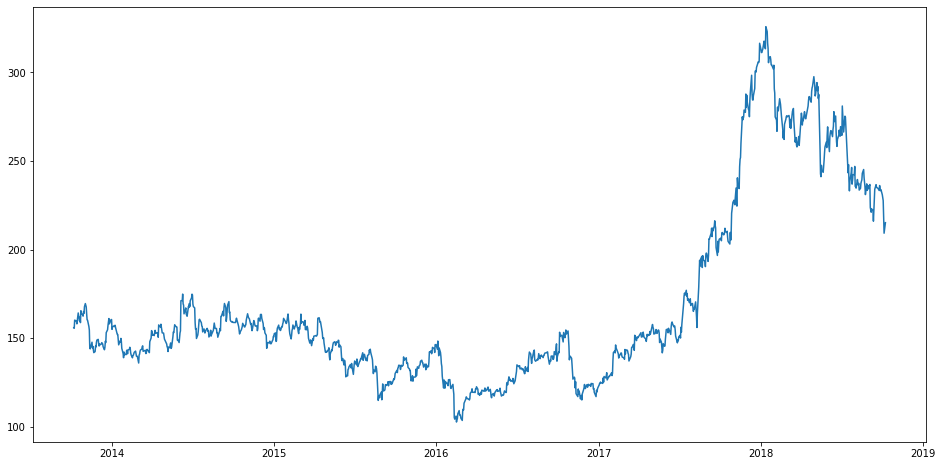

In [ ]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%d-%m-%Y')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

Linear Regression Model

In [ ]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [ ]:
#create features
from fastai.tabular import  add_datepart
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:63: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.

/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:64: FutureWarning:

casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



In [ ]:
new_data['mon_fri'] = 0
for i in range(0,len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#split into train and validation
train = new_data[:987]
valid = new_data[987:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

121.16291596522808

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



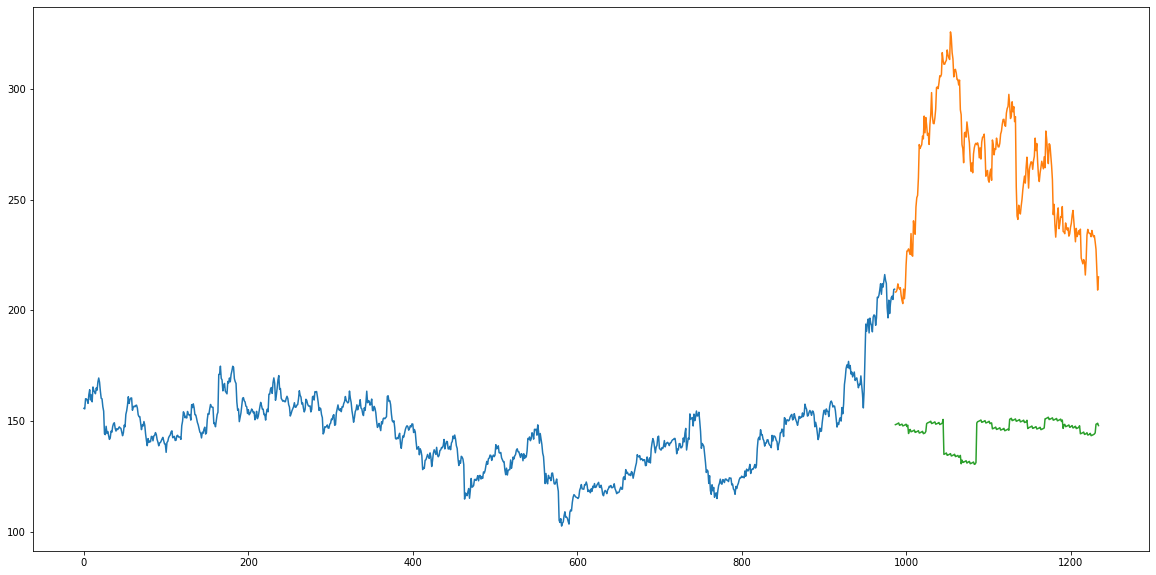

In [ ]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[987:].index
train.index = new_data[:987].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

k-Nearest Neighbours model

In [ ]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

In [ ]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

115.17086550026721

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



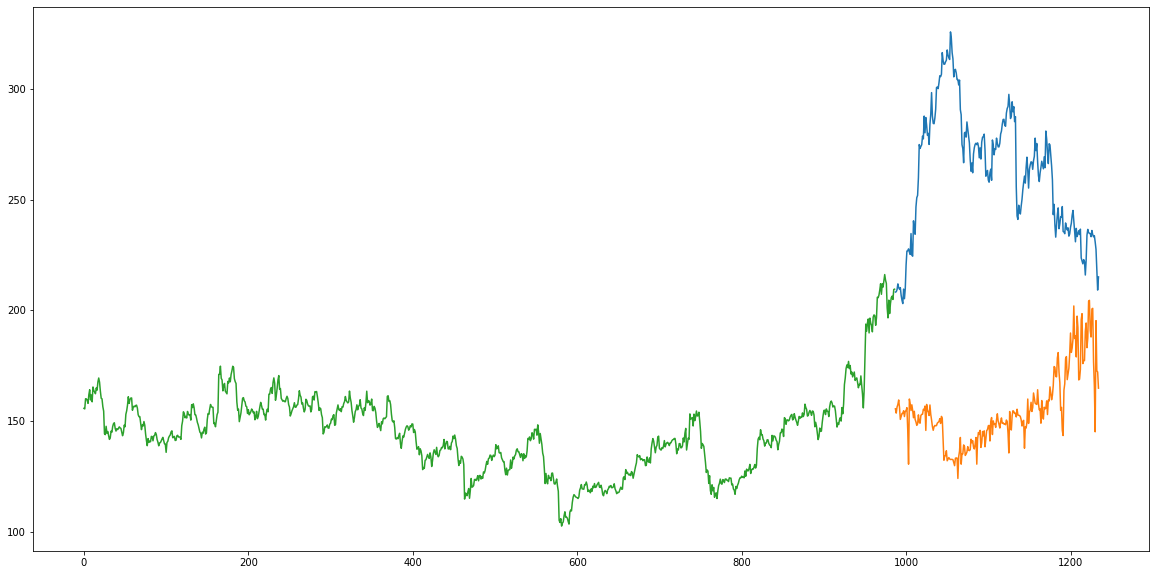

In [ ]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])

Auto-ARIMA model

In [ ]:
from pmdarima.arima import auto_arima
data = df.sort_index(ascending=True, axis=0)

train = data[:987]
valid = data[987:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=248)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=7.34 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5477.259, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5168.276, Time=1.19 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=5.77 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=5479.164, Time=0.13 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5076.280, Time=2.25 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=21.97 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=7.72 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5074.398, Time=1.51 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=5166.277, Time=0.66 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=9.99 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=2.20 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=5076.285, Time=1.12 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=5077.935, Time=2.36 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=5076.

In [ ]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

54.54322744872866

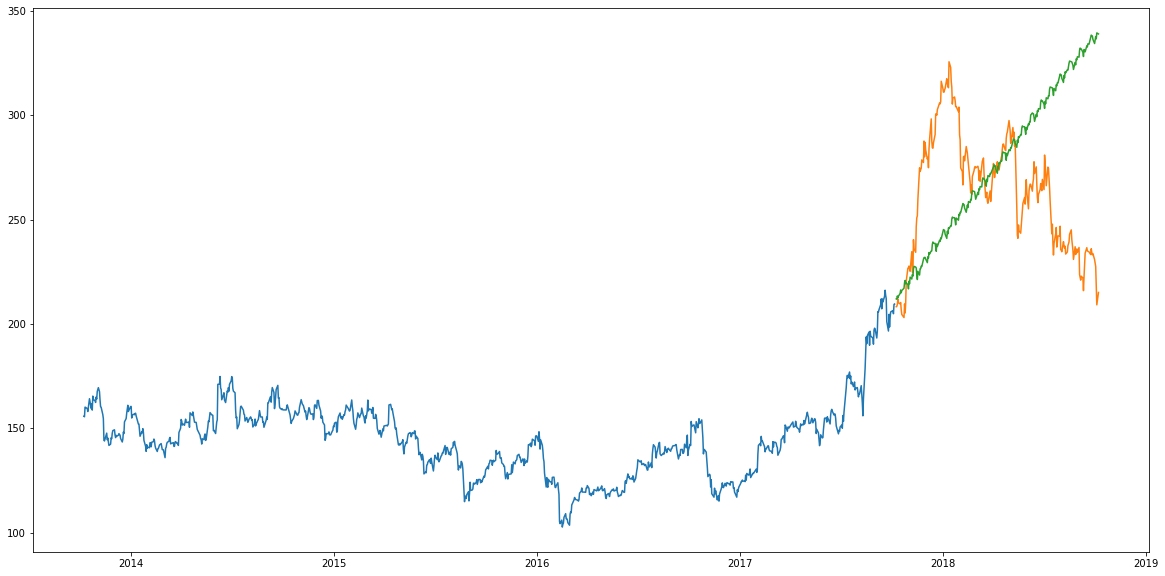

In [ ]:
#plot
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])

Prophet model

In [ ]:
#importing prophet
from fbprophet import Prophet

#creating dataframe
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
new_data.index = new_data['Date']

#preparing data
new_data.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

#train and validation
train = new_data[:987]
valid = new_data[987:]

#fit the model
model = Prophet()
model.fit(train)

#predictions
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#rmse
forecast_valid = forecast['yhat'][987:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms

57.31515213754124

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



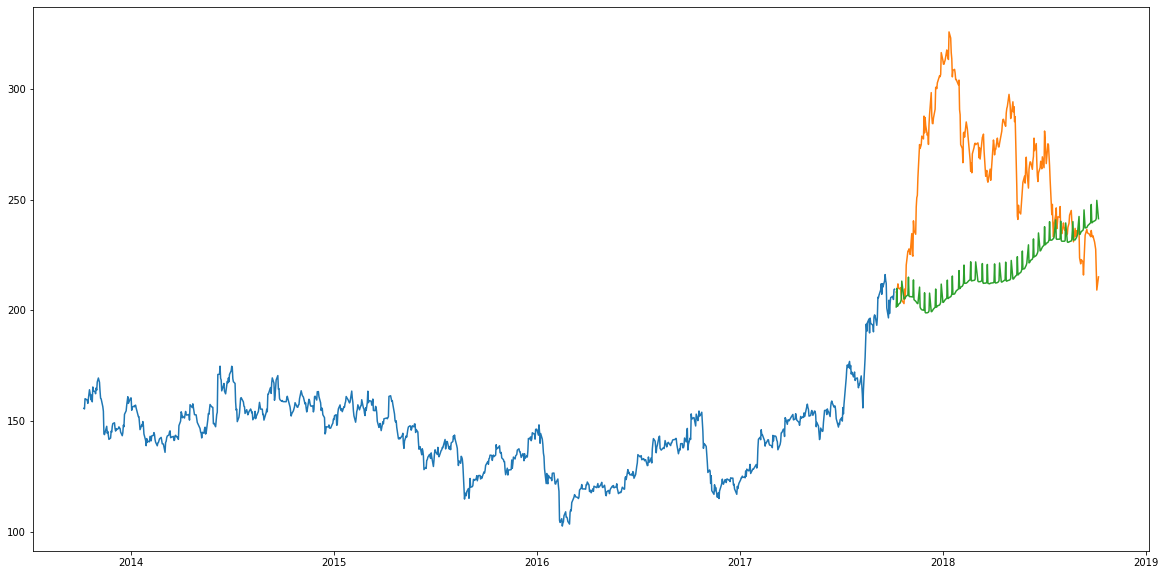

In [ ]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values

plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])

Long Short Term Memory Model

In [ ]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

927/927 - 30s - loss: 0.0012 - 30s/epoch - 33ms/step


In [ ]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

11.393317415942564

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



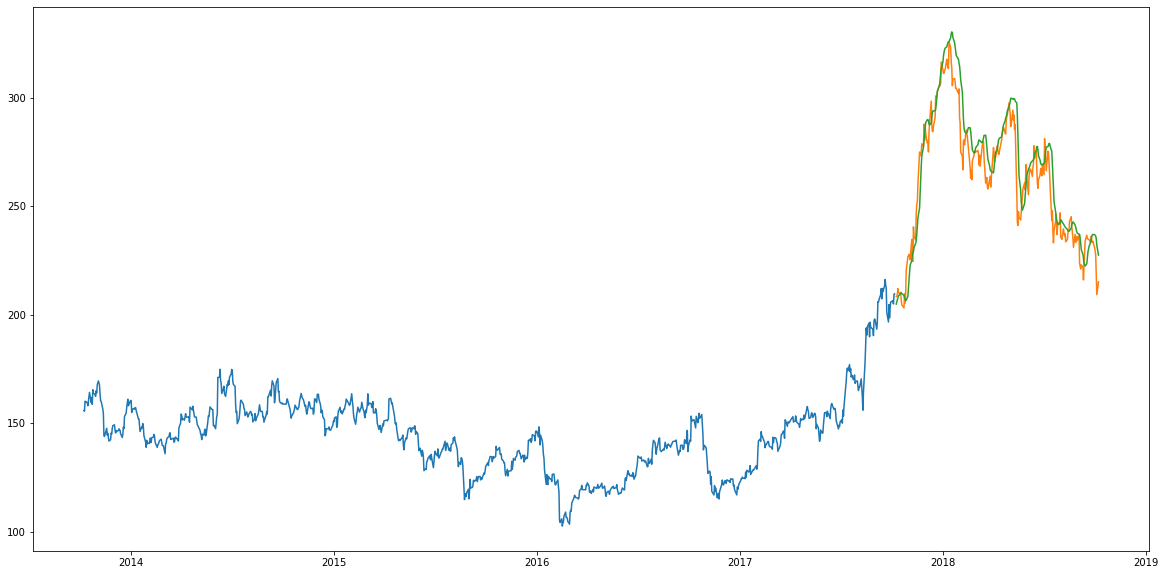

In [ ]:
#for plotting
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

# Google Stocks prediction


Long Short Term Memory

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout


In [ ]:
data = pd.read_csv(r'/content/Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [ ]:
data["Close"] = pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [ ]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : Length of the data
	X_train.append(trainData[i-60:i,0])
	y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [ ]:
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [ ]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size=32, verbose=2)

Epoch 1/20
35/35 - 15s - loss: 0.0323 - 15s/epoch - 419ms/step
Epoch 2/20
35/35 - 7s - loss: 0.0118 - 7s/epoch - 196ms/step
Epoch 3/20
35/35 - 7s - loss: 0.0095 - 7s/epoch - 197ms/step
Epoch 4/20
35/35 - 7s - loss: 0.0077 - 7s/epoch - 197ms/step
Epoch 5/20
35/35 - 7s - loss: 0.0099 - 7s/epoch - 197ms/step
Epoch 6/20
35/35 - 7s - loss: 0.0069 - 7s/epoch - 197ms/step
Epoch 7/20
35/35 - 8s - loss: 0.0079 - 8s/epoch - 219ms/step
Epoch 8/20
35/35 - 7s - loss: 0.0076 - 7s/epoch - 196ms/step
Epoch 9/20
35/35 - 7s - loss: 0.0069 - 7s/epoch - 194ms/step
Epoch 10/20
35/35 - 7s - loss: 0.0078 - 7s/epoch - 198ms/step
Epoch 11/20
35/35 - 7s - loss: 0.0068 - 7s/epoch - 196ms/step
Epoch 12/20
35/35 - 7s - loss: 0.0058 - 7s/epoch - 198ms/step
Epoch 13/20
35/35 - 7s - loss: 0.0058 - 7s/epoch - 199ms/step
Epoch 14/20
35/35 - 7s - loss: 0.0070 - 7s/epoch - 199ms/step
Epoch 15/20
35/35 - 7s - loss: 0.0053 - 7s/epoch - 199ms/step
Epoch 16/20
35/35 - 7s - loss: 0.0046 - 7s/epoch - 196ms/step
Epoch 17/20
35/

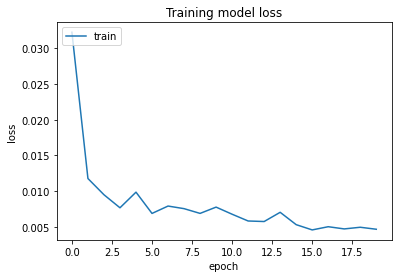

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
testData = pd.read_csv(r'/content/Google_test_data.csv')
testData['Close']=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values
#input array for the model
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):
  X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
predicted_price = sc.inverse_transform(y_pred)

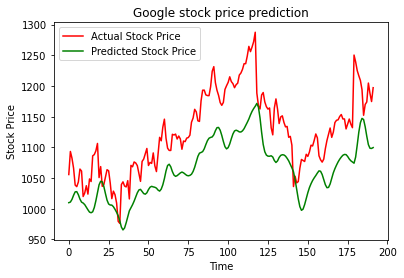

In [ ]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
rms=np.sqrt(np.mean(np.power((y_test-predicted_price),2)))
rms

68.2313328556336